In [1]:
import torch

# Define a custom neural network with a scalar output
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(1, 10)
        self.fc2 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x.squeeze()  # fix: return scalar instead of vector

# Create the neural network
net = Net()

# Define the loss function (mean squared error)
loss_fn = torch.nn.MSELoss()

# Define the optimizer (stochastic gradient descent)
learning_rate = 0.1
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

# Generate some training data
x_train = torch.linspace(0, 1, 1000).reshape(-1, 1)
y_train = torch.sin(x_train * 2 * 3.1416) 

# Train the neural network
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = net(x_train)

    # Compute the loss
    loss = loss_fn(y_pred, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


/home/irabiel/anaconda3/envs/fenicsproject/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1000/10000, Loss: 0.4995
Epoch 2000/10000, Loss: 0.4995
Epoch 3000/10000, Loss: 0.4995
Epoch 4000/10000, Loss: 0.4995
Epoch 5000/10000, Loss: 0.4995
Epoch 6000/10000, Loss: 0.4995
Epoch 7000/10000, Loss: 0.4995
Epoch 8000/10000, Loss: 0.4995
Epoch 9000/10000, Loss: 0.4995
Epoch 10000/10000, Loss: 0.4995


Epoch 0: Loss = 1.2502
Epoch 1000: Loss = 0.0199
Epoch 2000: Loss = 0.0060
Epoch 3000: Loss = 0.0044
Epoch 4000: Loss = 0.0036


/home/irabiel/anaconda3/envs/fenicsproject/lib/python3.10/site-packages/torch/_tensor.py:760: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


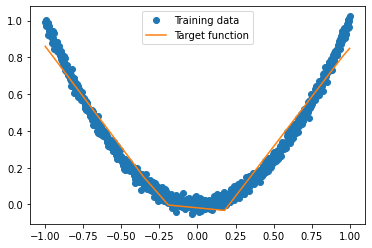

In [2]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the network
net = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Generate training data
x_train = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y_train = x_train.pow(2) + torch.randn(x_train.shape[0], 1) * 0.02

# Train the network
for epoch in range(5000):
    optimizer.zero_grad()
    y_pred = net(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item():.4f}')

# Test the network
# x_test = torch.tensor([[-1.0], [-0.5], [0.5], [1.0]])
x_test = torch.linspace(-1, 1, 1000)
x_test = x_test.resize(len(x_test),1)
y_test = net(x_test)
# print(f'x_test = {x_test.flatten().tolist()}, y_test = {y_test.flatten().tolist()}')

# Plot the results
plt.plot(x_train.detach().numpy(), y_train.detach().numpy(), 'o', label='Training data')
plt.plot(x_test.detach().numpy(), y_test.detach().numpy(), label='Target function')
plt.legend()
plt.show()


Epoch 0: Loss = 0.5799
Epoch 100: Loss = 0.0893
Epoch 200: Loss = 0.0377
Epoch 300: Loss = 0.0188
Epoch 400: Loss = 0.0102
Epoch 500: Loss = 0.0135
Epoch 600: Loss = 0.0047
Epoch 700: Loss = 0.0075
Epoch 800: Loss = 0.0052
Epoch 900: Loss = 0.0039


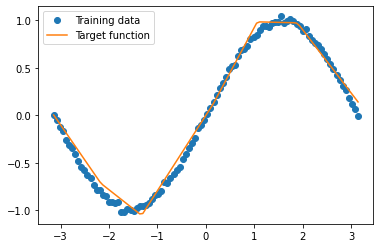

In [3]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the network
net = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

# Generate training data
x_train = torch.unsqueeze(torch.linspace(-torch.pi, torch.pi, 100), dim=1)
y_train = torch.sin(x_train) + torch.randn(x_train.shape[0], 1) * 0.02

# Train the network
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = net(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item():.4f}')

# Test the network
# x_test = torch.tensor([[-1.0], [-0.5], [0.5], [1.0]])
x_test = torch.torch.linspace(-torch.pi, torch.pi, 100)
x_test = x_test.resize(len(x_test),1)
y_test = net(x_test)
# print(f'x_test = {x_test.flatten().tolist()}, y_test = {y_test.flatten().tolist()}')

# Plot the results
plt.plot(x_train.detach().numpy(), y_train.detach().numpy(), 'o', label='Training data')
plt.plot(x_test.detach().numpy(), y_test.detach().numpy(), label='Target function')
plt.legend()
plt.show()


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 3)
        self.fc2 = nn.Linear(3, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define input tensor
x = torch.randn(10, 1)
    
# Create an instance of the network
net = Net()

# Enable automatic differentiation
for param in net.parameters():
    param.requires_grad = True

# Compute gradients
output = net(x)
output.backward(torch.ones_like(output))

# Print gradients
for param in net.parameters():
    print(param.grad)
    param.grad.zero_()

tensor([[0.0000],
        [0.0000],
        [1.1741]])
tensor([ 0.0000,  0.0000, -5.5716])
tensor([[ 0.0000,  0.0000, 10.3696]])
tensor([10.])


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.optimize import minimize_scalar

# # Define the neural network
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(1, 1)
        
#     def forward(self, x):
#         x = self.fc1(x)
#         return x
    
# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the loss function
def loss_fn(output, target):
    loss = (output - target)**2
    return loss

# Define the function we want to learn (y = x^2)
def f(x):
    return x**2

# Initialize the neural network and optimizer
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.05)

# Train the neural network using backpropagation and SciPy optimizer
for i in range(1000):
    x = torch.tensor(np.random.rand(1), dtype=torch.float32)
    target = torch.tensor(f(x), dtype=torch.float32)
    optimizer.zero_grad()
    output = net(x)
    loss = loss_fn(output, target)
    loss.backward(torch.ones_like(output))
    optimizer.step()
    if i % 100 == 0:
        print(f'Epoch {i}: Loss = {loss.item():.4f}')
    
# Test the neural network on some values of x
test_x = torch.tensor(np.array([-2.0, -1.0, 0.0, 1.0, 2.0]), dtype=torch.float32)
test_x = test_x.resize(len(test_x),1)
test_y = net(test_x)
print(net.fc1.weight, net.fc2.weight)


/tmp/ipykernel_23082/3390883743.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(f(x), dtype=torch.float32)


Epoch 0: Loss = 0.4620
Epoch 100: Loss = 0.0571
Epoch 200: Loss = 0.0002
Epoch 300: Loss = 0.0017
Epoch 400: Loss = 0.0002
Epoch 500: Loss = 0.0117
Epoch 600: Loss = 0.0019
Epoch 700: Loss = 0.0004
Epoch 800: Loss = 0.0169
Epoch 900: Loss = 0.0017
Parameter containing:
tensor([[-0.0687],
        [ 1.1286],
        [ 0.4463],
        [ 0.0352],
        [-0.5312]], requires_grad=True) Parameter containing:
tensor([[-0.1503,  0.7416,  0.2651,  0.0827, -0.2103]], requires_grad=True)


In [6]:
import torch
import torch.nn.functional as F
from scipy.optimize import minimize

# Define the network architecture
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = torch.nn.Linear(1, 1)

    def forward(self, x):
        x = self.fc(x)
        return x

# Define the loss function and training routine
def train(params):
    # Zero the gradients
    optimizer.zero_grad()

    # Convert params from scalar to tensor
    params = torch.tensor(params).float()

    # Forward pass
    y_pred = net(x)

    # Compute the loss
    loss = F.mse_loss(y_pred, y)

    # Backward pass
    loss.backward()

    # Extract the gradients
    grads = net.fc.weight.grad.item()

    return loss, grads

# Define the optimization routine
def optimize(params):
    # Convert params to tensor
    params_tensor = torch.tensor(params, requires_grad=True)
    
    # Train the network and get the loss and gradients
    loss, grads = train(params_tensor)
    
#     # Convert gradients from tensor to scalar
#     grads = grads.item()
    
    # Update the weights
    lr=0.1
    params -= lr * grads
    
    # Return the loss and updated parameters
    return loss.item(), params.item()

# Define the input and target data
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]], requires_grad=False)
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]], requires_grad=False)

# Initialize the network and optimizer
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# Initialize the weight parameter and optimize it with scipy
params0 = net.fc.weight.detach().numpy().item()
result = minimize(optimize, params0, jac=True, method='L-BFGS-B')
net.fc.weight = torch.nn.Parameter(torch.tensor(result.x).reshape(1, 1))

print(net.fc.weight)


Parameter containing:
tensor([[0.0563]], dtype=torch.float64, requires_grad=True)


/tmp/ipykernel_23082/1789716442.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params = torch.tensor(params).float()


In [7]:
import torch
import torch.nn as nn

# define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# create an instance of the network
net = Net()

# create some input data
input_data = torch.randn(1, 10)

# forward pass
output = net(input_data)

# create a loss function and compute the loss
loss_fn = nn.MSELoss()
target = torch.randn(1, 1)
loss = loss_fn(output, target)

# compute the gradients of the parameters
loss.backward()

# print the gradient of each parameter
for name, param in net.named_parameters():
    print(name, param.grad, param)

fc1.weight tensor([[ 0.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.0000, -0.0000,  0.0000,
         -0.0000, -0.0000],
        [ 0.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.0000, -0.0000,  0.0000,
         -0.0000, -0.0000],
        [ 0.8584,  0.8153, -1.0181, -0.0900, -0.0528,  0.1986, -0.5195,  1.5244,
         -0.7416, -0.8537],
        [-0.2304, -0.2188,  0.2732,  0.0242,  0.0142, -0.0533,  0.1394, -0.4091,
          0.1990,  0.2291],
        [ 0.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.0000, -0.0000,  0.0000,
         -0.0000, -0.0000]]) Parameter containing:
tensor([[-0.1798, -0.2143,  0.1961,  0.2625,  0.2782,  0.1386, -0.0168, -0.1501,
          0.1643, -0.1781],
        [-0.2441,  0.2548,  0.3114, -0.1325, -0.1931,  0.1271, -0.1174, -0.0723,
          0.1133,  0.0966],
        [-0.0590,  0.2183, -0.3049, -0.2703, -0.0473,  0.0574,  0.1348, -0.0818,
         -0.2179, -0.1007],
        [ 0.2045, -0.0710, -0.0168,  0.0299, -0.1856,  0.2495,  0.2883, -0.0033,
          0.1